<a href="https://colab.research.google.com/github/gamagilang/KPMG_Virtual_Internship/blob/master/KPMG_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/gamagilang/KPMG_Virtual_Internship.git

Cloning into 'KPMG_Virtual_Internship'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Excel File**

In [ ]:
xl = pd.ExcelFile('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx')

In [ ]:
xl.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [ ]:
print('Customer Demographic Data Frame:\n')
df1 = pd.read_excel('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'CustomerDemographic')
#df1.head(10)

Customer Demographic Data Frame:



In [ ]:
print('Customer Adress Data Frame:\n')
df2 = pd.read_excel('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'CustomerAddress')
#df2.head(10)

Customer Adress Data Frame:



In [ ]:
print('Transaction Data Frame:\n')
df3 = pd.read_excel('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'Transactions')
#df3.head(10)

Transaction Data Frame:



**Note** : The Column Labels are invalid or Unnamed. It seems like the 0 row index label of DataFrame are the ACTUAL COLUMN LABELS because there are Note on the first row of Excel File in which the pandas module consider it as the column label. So the furthur Label Cleaning should be done in the following code

**Clear Formating each DataFrame**

In [ ]:
## Making the datafame columns to be right
#df1 = df1.reset_index(None)
col1 = df1.iloc[0] #Column for df1
col2 = df2.iloc[0]
col3 = df3.iloc[0]
list_col = ['col1','col2','col3']
for col in list_col:
  if col == 'col1':
    df1.columns = col1
    df1 = df1.drop([0]).reset_index(drop = True)
  elif col == 'col2':
    df2.columns = col2
    df2 = df2.drop([0]).reset_index(drop = True)
  else:
    df3.columns = col3
    df3 = df3.drop([0]).reset_index(drop = True)  
#df1.head(10)


In [ ]:
print('\nDataFrame Customer Demographics:')
#df1.head(5)


DataFrame Customer Demographics:


In [ ]:
print('\nDataFrame Customer Address:')
df2.head(5)


DataFrame Customer Address:


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
print('\nDataFrame Customer Transaction:')
df3.head(5)


DataFrame Customer Transaction:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [ ]:
print('\nDataFrame Customer Demographics Info:\n')
print(df1.info())
print('\nDataFrame Customer Address Info:\n')
print(df2.info())
print('\nDataFrame Customer Transaction Info:\n')
print(df3.info())


DataFrame Customer Demographics Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  own

--> Checking miss Value

In [ ]:
print('\nNumber Missing Value Each Feature in Customer Demographics:')
print(df1.isnull().sum())
print('\nNumber Missing Value Each Feature in Customer Address:')
print(df2.isnull().sum())
print('\nNumber Missing Value Each Feature in Transaction:')
print(df3.isnull().sum())


Number Missing Value Each Feature in Customer Demographics:
0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

Number Missing Value Each Feature in Customer Address:
0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Number Missing Value Each Feature in Transaction:
0
transaction_id               0
product_id                   0
customer_id                  0
tran

**Note**: A lot of missing value that should be dealing with

--> Checking Consistancy Value

In [ ]:
print('\nUnique Value in Each Feature in Customer Demographic]:')
for col in df1.columns:
  print('\nNumber Unique Value in "{}" Feature:\n'.format(col))
  print(df1[col].value_counts())


Unique Value in Each Feature in Customer Demographic]:

Number Unique Value in "customer_id" Feature:

4000    1
1329    1
1342    1
1341    1
1340    1
       ..
2662    1
2661    1
2660    1
2659    1
1       1
Name: customer_id, Length: 4000, dtype: int64

Number Unique Value in "first_name" Feature:

Max        5
Timmie     5
Tobe       5
Pail       4
Osgood     4
          ..
Brena      1
Woody      1
Anthia     1
Bren       1
Erasmus    1
Name: first_name, Length: 3139, dtype: int64

Number Unique Value in "last_name" Feature:

Ramsdell      3
Pristnor      3
Strutz        2
Dabbes        2
Cliff         2
             ..
Wrout         1
Vautre        1
Dublin        1
Goodfield     1
Markushkin    1
Name: last_name, Length: 3725, dtype: int64

Number Unique Value in "gender" Feature:

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

Number Unique Value in "past_3_years_bike_related_purchases" Feature:

16    5

In [ ]:
print('\nUnique Value in Each Feature in Customer Address:')
for col in df2.columns:
  print('\nNumber Unique Value in "{}" Feature:\n'.format(col))
  print(df2[col].value_counts())


Unique Value in Each Feature in Customer Address:

Number Unique Value in "customer_id" Feature:

4003    1
1332    1
1345    1
1344    1
1343    1
       ..
2665    1
2664    1
2663    1
2662    1
1       1
Name: customer_id, Length: 3999, dtype: int64

Number Unique Value in "address" Feature:

3 Talisman Place           2
3 Mariners Cove Terrace    2
64 Macpherson Junction     2
95 Old Gate Junction       1
010 Namekagon Parkway      1
                          ..
8 Randy Parkway            1
5 Stoughton Parkway        1
2294 Pleasure Place        1
94850 Moland Street        1
53 Dunning Lane            1
Name: address, Length: 3996, dtype: int64

Number Unique Value in "postcode" Feature:

2170    31
2145    30
2155    30
2153    29
2560    26
        ..
2469     1
4155     1
2474     1
3093     1
3094     1
Name: postcode, Length: 873, dtype: int64

Number Unique Value in "state" Feature:

NSW                2054
VIC                 939
QLD                 838
New South Wales   

In [ ]:
print('\nUnique Value in Each Feature in Transaction:')
for col in df3.columns:
  print('\nNumber Unique Value in "{}" Feature:\n'.format(col))
  print(df3[col].value_counts())


Unique Value in Each Feature in Transaction:

Number Unique Value in "transaction_id" Feature:

20000    1
6670     1
6663     1
6664     1
6665     1
        ..
13334    1
13335    1
13336    1
13337    1
1        1
Name: transaction_id, Length: 20000, dtype: int64

Number Unique Value in "product_id" Feature:

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

Number Unique Value in "customer_id" Feature:

2476    14
1068    14
2183    14
2464    13
3232    13
        ..
2394     1
3428     1
191      1
1846     1
2876     1
Name: customer_id, Length: 3494, dtype: int64

Number Unique Value in "transaction_date" Feature:

2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-08-29    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

Num

We want to make combined dataframe in wich consist of the three of above dataframe called df1, df2, and df3. But the things to be considered is that the combined dataframe must be sort by costumer_id. 

**Data Preprocessing CustomerDemographic DataFrame (df1)**

---



Data Preprocessing CustomerDemographic DataFrame (df1) : Data Transformation


--> we need to combine the first name and last name in customer demographic because there are many missing values in last name since it is obvious for person who only have first name

In [ ]:
df1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object', name=0)

In [ ]:
def df1_name (x):
  l = []
  for elm in x:
    l.append(elm)
  l = [x for x in l if str(x) != 'nan']
  return " ".join(l)

df1['name'] = df1[df1.columns[1:3]].astype(str).apply(df1_name,axis = 1)
df1 = df1.reindex(columns = ['customer_id', 'name', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure']).drop(columns=['first_name','last_name'])
df1.head()


,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   name                                 4000 non-null   object
 2   gender                               4000 non-null   object
 3   past_3_years_bike_related_purchases  4000 non-null   object
 4   DOB                                  3913 non-null   object
 5   job_title                            3494 non-null   object
 6   job_industry_category                3344 non-null   object
 7   wealth_segment                       4000 non-null   object
 8   deceased_indicator                   4000 non-null   object
 9   default                              3698 non-null   object
 10  owns_car                             4000 non-null   object
 11  tenure                               3913 n

--> Deleting Default Feature

**Note** :

PROBLEM (Relefancy) : Irrelevance 'default' feature 
From The First 10 rows of DataFrame above, the feature named 'default' doesn't show any valid and distincable information so we just need to delete this row.
SOLUTION : Delete feature

In [ ]:
## Deleting default feature
df1 = df1.drop(columns='default')
df1.head(5)

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,4,Talbot,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
4,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8


--> Checking Data Frame Info (Type, Total Index Number per Column)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   name                                 4000 non-null   object
 2   gender                               4000 non-null   object
 3   past_3_years_bike_related_purchases  4000 non-null   object
 4   DOB                                  3913 non-null   object
 5   job_title                            3494 non-null   object
 6   job_industry_category                3344 non-null   object
 7   wealth_segment                       4000 non-null   object
 8   deceased_indicator                   4000 non-null   object
 9   owns_car                             4000 non-null   object
 10  tenure                               3913 non-null   object
dtypes: object(11)
memory usage: 343.9+ KB


**Note**: The DataFrame info above shows the possible several columns have missing value e.g: last_name, DOB, job_title,job_industry_category,default,tenure. We should checking and cleaning in order to make the prediction model a lot easier and reliable. 

--> Checking Unique customer_id Number




**Note** : 

It is a common thing to check the duplicate when dealing with customer_id data due to possible mistake in the input process like human error or technical error. 

In [ ]:
print('Number of Unique Values in customer ID : \n',df1.customer_id.nunique())
print('Number of Unique Values in First Name : \n',df1.name.nunique())


Number of Unique Values in customer ID : 
 4000
Number of Unique Values in First Name : 
 3998


**Note** : 
The above code shows that there are 4000 unique number in customer_id which means there are no duplicate id number. 

It is okay if there are 2 identical Name since it is common for person who have identical name.

--> Checking Mising Values

In [ ]:
print('\nThe number missing value in each feature')
df1.isnull().sum()


The number missing value in each feature


0
customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

--> Dealing with missing Values

In [ ]:
col_miss = ['DOB','job_title','job_industry_category']
for col in col_miss:
  if (col == 'job_title'):
    df1[col].fillna(value='Other', inplace = True)
  elif (col == 'job_industry_category'):
    df1[col].fillna(value='Other', inplace = True)
  else:
    df1.dropna(subset=['DOB'],inplace = True)
print('Current Number Missing Value in Each Feature')
print(df1.isnull().sum())

Current Number Missing Value in Each Feature
0
customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3913 non-null   object
 1   name                                 3913 non-null   object
 2   gender                               3913 non-null   object
 3   past_3_years_bike_related_purchases  3913 non-null   object
 4   DOB                                  3913 non-null   object
 5   job_title                            3913 non-null   object
 6   job_industry_category                3913 non-null   object
 7   wealth_segment                       3913 non-null   object
 8   deceased_indicator                   3913 non-null   object
 9   owns_car                             3913 non-null   object
 10  tenure                               3913 non-null   object
dtypes: object(11)
memory usage: 366.8+ KB


In [ ]:
df1.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,4,Talbot,Male,33,1961-10-03 00:00:00,Other,IT,Mass Customer,N,No,7
4,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Other,Affluent Customer,N,Yes,8


**Note** :

The Dataset now is free from missing value and has a 3913 samples even we still have missing value in last_name feature but it doesnt contribute in customer segmentation using RMF and also in predictive modelling using machine learning method

--> Checking The Un-Standard Value of each column.

**Note**: 

It is a common thing in gender data to have various spelling in gender classification like Women,women,W,Male,male,M,ect. So we need to like equalize male gender type to 'Male' and female to 'Female' form. And also we wanna do this to all of the columns name.

In [ ]:
# Checking Unstandard Value
for col_name in df1.columns:
  print('\nUnique Values Count \033[1m'+'\033[0mVariable',col_name)
  print(df1[col_name].value_counts())


Unique Values Count Variable customer_id
4000    1
1343    1
1341    1
1340    1
1339    1
       ..
2661    1
2660    1
2659    1
2658    1
1       1
Name: customer_id, Length: 3913, dtype: int64

Unique Values Count Variable name
Corabelle             2
Stormie Smyth         1
Kerr Simmell          1
Frederico Spearman    1
Brendan Vicent        1
                     ..
Johnathan Audiss      1
Lena Chape            1
Zorina Bosomworth     1
Dulcine Gauson        1
Antons Ley            1
Name: name, Length: 3912, dtype: int64

Unique Values Count Variable gender
Female    2037
Male      1872
M            1
U            1
Femal        1
F            1
Name: gender, dtype: int64

Unique Values Count Variable past_3_years_bike_related_purchases
19    55
16    55
20    53
67    52
2     50
      ..
86    27
85    27
8     27
95    26
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

Unique Values Count Variable DOB
1978-01-30    7
1962-12-17    4
1964-07-08

**Note**: 

1) there are 3 type of gender which are U (LGBT), Male, and Female. But there are also M and F in which we might consider it as Male and Female respectively. Also there is on class of gender data named Femal in which we might also consider it as Female. Unfortunately, we notice that there is one particular gender classification named U, it dosent contribute significan to data distribution since only 1 frequency. So The next following codes labeled as "Code 1" are to standarize the gender data 

In [ ]:
## CODE 1
list_unstandard = ['M','F','Femal','U','Y']
for value in list_unstandard:
  if value == 'M':
    df1['gender'].replace(to_replace = ['M'], value = ['Male'], inplace = True)
  elif value == 'F':
    df1['gender'].replace(to_replace = ['F'], value = ['Female'], inplace = True)
  elif value == 'Femal':
    df1['gender'].replace(to_replace = ['Femal'], value = ['Female'], inplace = True)
  else :
    df1 = df1.drop(index = df1.loc[df1.gender == 'U'].index).reset_index(drop = True)
  #else:
    #df1 = df1.drop(index = df1.loc[df1.deceased_indicator == 'Y'].index).reset_index(drop = True)

#print(df3.gender.value_counts())  
#for i,v in enumerate(df3['gender'].value_counts()):
 # plt.text(v+10,i-0.01, str(v), color = 'black')

In [ ]:
for col in df1.columns:
  print('\nUnique Value Counts in Variable "{}" :'.format(col))
  print(df1[col].value_counts())


Unique Value Counts in Variable "customer_id" :
4000    1
1344    1
1342    1
1341    1
1340    1
       ..
2662    1
2661    1
2660    1
2659    1
1       1
Name: customer_id, Length: 3912, dtype: int64

Unique Value Counts in Variable "name" :
Corabelle             2
Stormie Smyth         1
Kerr Simmell          1
Frederico Spearman    1
Brendan Vicent        1
                     ..
Lena Chape            1
Zorina Bosomworth     1
Dulcine Gauson        1
Griffith Minor        1
Antons Ley            1
Name: name, Length: 3911, dtype: int64

Unique Value Counts in Variable "gender" :
Female    2039
Male      1873
Name: gender, dtype: int64

Unique Value Counts in Variable "past_3_years_bike_related_purchases" :
19    55
16    55
20    53
67    52
2     50
      ..
86    27
85    27
8     27
95    26
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

Unique Value Counts in Variable "DOB" :
1978-01-30    7
1964-07-08    4
1976-09-25    4
1978-08-19    4
196

--> Checking Accuracy of Datasets: 
Detecting possible outliers in feature; tenure 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


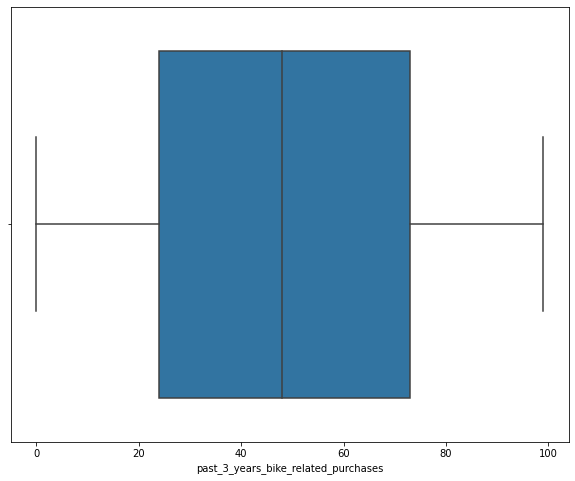

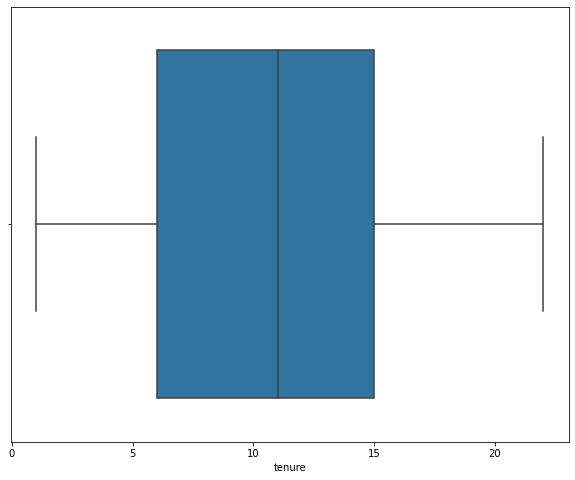

In [ ]:
import seaborn as sns
col_outlier = ['past_3_years_bike_related_purchases','tenure']
for col in df1[col_outlier]:
  plt.figure(figsize=(10,8))
  sns.boxplot(df1[col])

Data Preprocessing CustomerDemographic DataFrame (df1) : Feature Enginerring


--> Adding Demographic Info : Age

In [ ]:
now = pd.Timestamp('now')
df1['age'] = (now - df1['DOB']).astype('<m8[Y]') # 3

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   object 
 1   name                                 3912 non-null   object 
 2   gender                               3912 non-null   object 
 3   past_3_years_bike_related_purchases  3912 non-null   object 
 4   DOB                                  3912 non-null   object 
 5   job_title                            3912 non-null   object 
 6   job_industry_category                3912 non-null   object 
 7   wealth_segment                       3912 non-null   object 
 8   deceased_indicator                   3912 non-null   object 
 9   owns_car                             3912 non-null   object 
 10  tenure                               3912 non-null   object 
 11  age                           

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


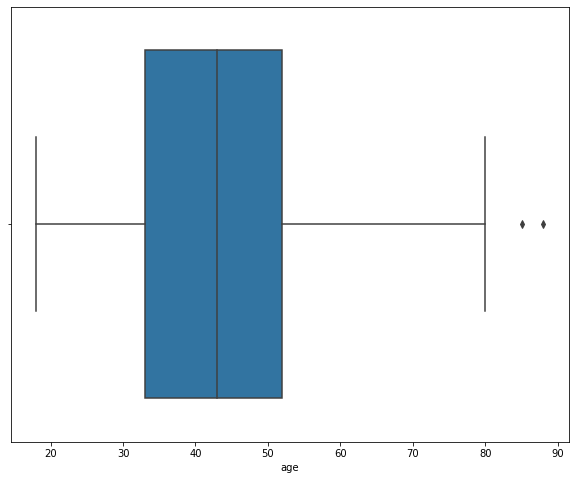

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(df1['age'])

**Data Preprocessing Customer Address DataFrame (df2)**

---



Data Preprocessing Customer Address DataFrame (df2) : Data Transformation




In [ ]:
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [ ]:
df2.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
df2.customer_id.nunique()

3999

In [ ]:
for col in df2.columns:
  print('\nUnique Value in feature "{}" :'.format(col))
  print(df2[col].value_counts())


Unique Value in feature "customer_id" :
4003    1
1332    1
1345    1
1344    1
1343    1
       ..
2665    1
2664    1
2663    1
2662    1
1       1
Name: customer_id, Length: 3999, dtype: int64

Unique Value in feature "address" :
3 Talisman Place           2
3 Mariners Cove Terrace    2
64 Macpherson Junction     2
95 Old Gate Junction       1
010 Namekagon Parkway      1
                          ..
8 Randy Parkway            1
5 Stoughton Parkway        1
2294 Pleasure Place        1
94850 Moland Street        1
53 Dunning Lane            1
Name: address, Length: 3996, dtype: int64

Unique Value in feature "postcode" :
2170    31
2145    30
2155    30
2153    29
2560    26
        ..
2469     1
4155     1
2474     1
3093     1
3094     1
Name: postcode, Length: 873, dtype: int64

Unique Value in feature "state" :
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Unique Value in featur

**Note:** 

We notice the unstandard value in State. To addres this problem, we sould use .replace in order to standardize the value

In [ ]:
df2 = df2.replace(to_replace=['New South Wales','Victoria'], value = ['NSW','VIC'])
print(df2.state.value_counts())

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64


In [ ]:
print('Customer Address Info')
print(df2.info())
print(df2.isnull().any())

Customer Address Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
None
0
customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool


**Note**:
Now the Customer Adrees dataset is celan and we are going to combine the customer demographic and customer address

In [ ]:
df = pd.merge(df1, df2, on='customer_id')
df

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Laraine Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,67.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,Male,33,1961-10-03 00:00:00,Other,IT,Mass Customer,N,No,7,59.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Other,Affluent Customer,N,Yes,8,43.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr Duckhouse,Male,35,1966-09-16 00:00:00,Other,Retail,High Net Worth,N,Yes,13,54.0,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3995,Rusty Iapico,Male,93,1975-12-12 00:00:00,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,44.0,613 Erie Lane,2088,NSW,Australia,12
3904,3996,Rosalia Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19,45.0,0 Transport Center,3977,VIC,Australia,6
3905,3997,Blanch Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1,19.0,4 Dovetail Crossing,2350,NSW,Australia,2
3906,3999,Patrizius,Male,11,1973-10-24 00:00:00,Other,Manufacturing,Affluent Customer,N,Yes,10,46.0,1482 Hauk Trail,3064,VIC,Australia,3


In [ ]:
# Re-arrange the columns
df.columns

Index(['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'DOB', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object', name=0)

In [ ]:
df = df.reindex(columns=['customer_id', 'name', 'gender','DOB','age','address','postcode', 'state', 'country','deceased_indicator','job_title', 
                    'job_industry_category','tenure','past_3_years_bike_related_purchases','owns_car','property_valuation','wealth_segment'])
df.head()

,customer_id,name,gender,DOB,age,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment
0,1,Laraine Medendorp,Female,1953-10-12 00:00:00,67.0,060 Morning Avenue,2016,NSW,Australia,N,Executive Secretary,Health,11,93,Yes,10,Mass Customer
1,2,Eli Bockman,Male,1980-12-16 00:00:00,39.0,6 Meadow Vale Court,2153,NSW,Australia,N,Administrative Officer,Financial Services,16,81,Yes,10,Mass Customer
2,4,Talbot,Male,1961-10-03 00:00:00,59.0,0 Holy Cross Court,4211,QLD,Australia,N,Other,IT,7,33,No,9,Mass Customer
3,5,Sheila-kathryn Calton,Female,1977-05-13 00:00:00,43.0,17979 Del Mar Point,2448,NSW,Australia,N,Senior Editor,Other,8,56,Yes,4,Affluent Customer
4,6,Curr Duckhouse,Male,1966-09-16 00:00:00,54.0,9 Oakridge Court,3216,VIC,Australia,N,Other,Retail,13,35,Yes,9,High Net Worth


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 0 to 3907
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3908 non-null   object 
 1   name                                 3908 non-null   object 
 2   gender                               3908 non-null   object 
 3   DOB                                  3908 non-null   object 
 4   age                                  3908 non-null   float64
 5   address                              3908 non-null   object 
 6   postcode                             3908 non-null   int64  
 7   state                                3908 non-null   object 
 8   country                              3908 non-null   object 
 9   deceased_indicator                   3908 non-null   object 
 10  job_title                            3908 non-null   object 
 11  job_industry_category         

**Data Preprocessing Transaction List (df3)**

Data Preprocessing Transaction List : Data Transformation

In [ ]:
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


--> Checking Missing Values

In [ ]:
df3.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

--> Dealing with Missing Values

In [ ]:
#df3_test = df3.copy(deep=True)
df3_col_miss_value = ['online_order', 'brand', 'product_line','product_class', 'product_size', 'standard_cost', 'product_first_sold_date'] 
for col in df3_col_miss_value:
  if col == 'online_order': 
    df3.dropna(subset= ['online_order'], inplace = True)  
  elif col == 'brand' :
    df3[col].fillna(value = 'Other', inplace = True)
  elif col == 'product_line': 
    df3[col].fillna(value = 'Other', inplace = True)
  elif col == 'product_size':
    df3[col].fillna(value = 'Other', inplace = True)
  elif col == 'standard_cost':
    df3.dropna(subset=['standard_cost'], inplace = True)
  else:
    df3.dropna(subset = ['product_first_sold_date'], inplace= True)
   # df3_test = df3_test[col].dropna(subset=['standard_cost'], inplace = True)
#df3_test.head()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           19445 non-null  object
 1   product_id               19445 non-null  object
 2   customer_id              19445 non-null  object
 3   transaction_date         19445 non-null  object
 4   online_order             19445 non-null  object
 5   order_status             19445 non-null  object
 6   brand                    19445 non-null  object
 7   product_line             19445 non-null  object
 8   product_class            19445 non-null  object
 9   product_size             19445 non-null  object
 10  list_price               19445 non-null  object
 11  standard_cost            19445 non-null  object
 12  product_first_sold_date  19445 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [ ]:
df3.isnull().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

--> Checking Unstandard Data

In [ ]:
for col in df3.columns:
  print('\nUnique Value in Feature "{}" :'.format(col))
  print(df3[col].value_counts())


Unique Value in Feature "transaction_id" :
20000    1
6641     1
6643     1
6645     1
6646     1
        ..
13320    1
13321    1
13322    1
13323    1
1        1
Name: transaction_id, Length: 19445, dtype: int64

Unique Value in Feature "product_id" :
0      1157
3       349
1       305
38      267
35      261
       ... 
16      134
71      134
8       132
100     126
47      118
Name: product_id, Length: 101, dtype: int64

Unique Value in Feature "customer_id" :
1068    14
2183    14
2476    14
1946    13
2548    13
        ..
2749     1
3161     1
302      1
1325     1
2532     1
Name: customer_id, Length: 3492, dtype: int64

Unique Value in Feature "transaction_date" :
2017-02-14    81
2017-08-18    81
2017-10-15    73
2017-01-31    72
2017-12-19    70
              ..
2017-12-07    37
2017-01-12    36
2017-09-25    35
2017-03-29    34
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

Unique Value in Feature "online_order" :
True     9739
False    9706
Name: on

**Note** : All value within all feature are standard

--> Checking unique transaction ID

In [ ]:
print('Unique Values in Transaction ID:')
print(df3['transaction_id'].nunique())

Unique Values in Transaction ID:
19445


**Note** : Its Unique

--> Making date format in feature 'product_first_sold_date' valid (Still cant find the method)

In [ ]:
from datetime import datetime
#df3 = df3.copy(deep = True)
df3['product_first_sold_date'] = df3['product_first_sold_date'].astype(float)
#df3_test['product_first_sold_date_new'] = df3_test['product_first_sold_date'].apply('{:06}'.format)
now = pd.Timestamp('now')
df3['product_first_sold_date'] = pd.to_datetime(df3['product_first_sold_date'],unit='D', origin=pd.Timestamp('1900-01-01'))#based on microsoft excel origin format 

In [ ]:
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1998-12-18
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,2015-08-12


In [ ]:
aa = df3[df3['brand'] == 'Solex']
aa.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87
8,9,67,1305,2017-08-10 00:00:00,False,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-07,690.49
36,37,14,1040,2017-01-09 00:00:00,False,Approved,Solex,Standard,high,large,1842.92,1105.75,1995-10-26,737.17
37,38,2,2916,2017-12-06 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1991-11-09,17.87
41,42,79,3398,2017-05-14 00:00:00,False,Approved,Solex,Touring,medium,large,2083.94,675.03,2013-09-18,1408.91


Data Preprocessing Transaction List : Feature Engineering

--> Add Profit Attribute

In [ ]:
df3['profit'] = df3['list_price']-df3['standard_cost']


--> Add RFM (recency, frequency, monetary)

In [ ]:
import datetime as dt
df3_test = df3.copy(deep=True)
df3_test['transaction_date'] = pd.to_datetime(df3_test['transaction_date'])
NOW = df3_test['transaction_date'].max()
# Recency
rfmTable = df3_test.groupby('customer_id').agg({'transaction_date': lambda x: (NOW - x.max()).days, # Recency
                                        'transaction_id': lambda x: len(x),      # Frequency
                                        'profit': lambda x: x.sum()}) # Monetary Value

rfmTable['transaction_date'] = rfmTable['transaction_date'].astype(int)
rfmTable.rename(columns={'transaction_date': 'recency', 
                         'transaction_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)
rfmTable.reset_index(level=0, inplace=True)
rfmTable.head()

,customer_id,recency,frequency,monetary_value
0,1,7,11,3018.09
1,2,128,3,2226.26
2,3,102,7,3290.21
3,4,195,2,220.57
4,5,16,6,2394.94


In [ ]:
quantiles = rfmTable.drop(columns = 'customer_id').quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
#print(quantiles)
rfmSegmentation = rfmTable

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = dataframe Value row list)
def RFM_Class (x):
  L = []
  for elm in x:
    L.append(elm)
  return "".join(L)

# Feature Enginering For RFM Analysis
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles))
rfmSegmentation['RFM_Class'] = rfmSegmentation[rfmSegmentation.columns[4:7]].astype(str).apply(RFM_Class, axis=1)
rfmSegmentation.head()

,customer_id,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Class
0,1,7,11,3018.09,1,1,2,112
1,2,128,3,2226.26,4,4,3,443
2,3,102,7,3290.21,4,2,2,422
3,4,195,2,220.57,4,4,4,444
4,5,16,6,2394.94,1,2,3,123


In [ ]:
df3['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [ ]:
brand_solex = df3.copy(deep=True)
brand_solex['Valid'] = brand_solex['brand'].astype(str).str.match(r'Solex')
brand_solex = brand_solex[brand_solex['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_solex = pd.DataFrame(brand_solex.groupby('customer_id')['brand'].value_counts())
brand_solex.columns = ['Solex']
brand_solex.reset_index(level=0,inplace = True)
brand_solex.reset_index(level=0,inplace = True)
brand_solex.drop(columns=['brand'], axis = 1,inplace=True)


brand_weareA2B = df3.copy(deep=True)
brand_weareA2B['Valid']= brand_weareA2B['brand'].astype(str).str.match(r'WeareA2B')
brand_weareA2B = brand_weareA2B[brand_weareA2B['Valid']==True].drop(columns = ['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'], axis = 1)
brand_weareA2B = pd.DataFrame(brand_weareA2B.groupby('customer_id')['brand'].value_counts())
brand_weareA2B.columns = ['WeareA2B']
brand_weareA2B.reset_index(level=0,inplace = True)
brand_weareA2B.reset_index(level=0,inplace = True)
brand_weareA2B.drop(columns=['brand'], axis = 1,inplace=True)


brand_giant_bicycles = df3.copy(deep = True)
brand_giant_bicycles['Valid'] = brand_giant_bicycles['brand'].astype(str).str.match(r'Giant Bicycles')
brand_giant_bicycles = brand_giant_bicycles[brand_giant_bicycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_giant_bicycles = pd.DataFrame(brand_giant_bicycles.groupby('customer_id')['brand'].value_counts())
brand_giant_bicycles.columns = ['Giant Bicycles']
brand_giant_bicycles.reset_index(level=0,inplace = True)
brand_giant_bicycles.reset_index(level=0,inplace = True)
brand_giant_bicycles.drop(columns=['brand'], axis = 1,inplace=True)


brand_ohm_cycles = df3.copy(deep=True)
brand_ohm_cycles['Valid'] = brand_ohm_cycles['brand'].astype(str).str.match(r'OHM Cycles')
brand_ohm_cycles = brand_ohm_cycles[brand_ohm_cycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_ohm_cycles = pd.DataFrame(brand_ohm_cycles.groupby('customer_id')['brand'].value_counts())
brand_ohm_cycles.columns = ['OHM Cycles']
brand_ohm_cycles.reset_index(level=0,inplace = True)
brand_ohm_cycles.reset_index(level=0,inplace = True)
brand_ohm_cycles.drop(columns=['brand'], axis = 1,inplace=True)


brand_trek_bicycles = df3.copy(deep=True)
brand_trek_bicycles['Valid'] = brand_trek_bicycles['brand'].astype(str).str.match(r'Trek Bicycles')
brand_trek_bicycles = brand_trek_bicycles[brand_trek_bicycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_trek_bicycles = pd.DataFrame(brand_trek_bicycles.groupby('customer_id')['brand'].value_counts())
brand_trek_bicycles.columns = ['Trek Bicycles']
brand_trek_bicycles.reset_index(level=0,inplace = True)
brand_trek_bicycles.reset_index(level=0,inplace = True)
brand_trek_bicycles.drop(columns=['brand'], axis = 1,inplace=True)


brand_norco_bicycles = df3.copy(deep=True)
brand_norco_bicycles['Valid'] = brand_norco_bicycles['brand'].astype(str).str.match(r'Norco Bicycles')
brand_norco_bicycles = brand_norco_bicycles[brand_norco_bicycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'], axis = 1)
brand_norco_bicycles = pd.DataFrame(brand_norco_bicycles.groupby('customer_id')['brand'].value_counts())
brand_norco_bicycles.columns = ['Norco Bicycles']
brand_norco_bicycles.reset_index(level=0,inplace = True)
brand_norco_bicycles.reset_index(level=0,inplace = True)
brand_norco_bicycles.drop(columns=['brand'], axis = 1,inplace=True)


In [ ]:
def brands_dataframe(brand_list):
  brand_list = [brand_solex,brand_giant_bicycles,brand_weareA2B,brand_ohm_cycles,brand_trek_bicycles,brand_norco_bicycles]
  left_brands_2nd = brand_list[0]
  right_brands_2nd = brand_list[1]
  brands_2nd_merge = pd.merge(left = left_brands_2nd,right = right_brands_2nd,how='outer', sort = True)
  left_brands_3rd = brands_2nd_merge
  right_brands_3rd = brand_list[2]
  brands_3rd_merge = pd.merge(left = left_brands_3rd,right = right_brands_3rd, how='outer', sort = True )
  left_brands_4th = brands_3rd_merge
  right_brands_4th = brand_list[3]
  brands_4th_merge = pd.merge(left = left_brands_4th, right = right_brands_4th, how = 'outer', sort = True)
  left_brands_5th = brands_4th_merge
  right_brands_5th = brand_list[4]
  brands_5th_merge = pd.merge(left = left_brands_5th, right = right_brands_5th, how = 'outer', sort = True)
  left_brands_6th = brands_5th_merge
  right_brands_6th = brand_list[5]
  brands_6th_merge = pd.merge(left = left_brands_6th, right = right_brands_6th, how = 'outer', sort = True)  
  return brands_6th_merge

brand_list = [brand_solex,brand_giant_bicycles,brand_weareA2B,brand_ohm_cycles,brand_trek_bicycles,brand_norco_bicycles]
df_brands = pd.DataFrame(brands_dataframe(brand_list))

df_brands.info()
df_brands.fillna(value = 0, inplace = True)
df_brands.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3491
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     3492 non-null   int64  
 1   Solex           2446 non-null   float64
 2   Giant Bicycles  2155 non-null   float64
 3   WeareA2B        2138 non-null   float64
 4   OHM Cycles      1994 non-null   float64
 5   Trek Bicycles   2004 non-null   float64
 6   Norco Bicycles  1922 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 218.2 KB


,customer_id,Solex,Giant Bicycles,WeareA2B,OHM Cycles,Trek Bicycles,Norco Bicycles
0,1,2.0,4.0,0.0,2.0,1.0,2.0
1,2,0.0,1.0,2.0,0.0,0.0,0.0
2,3,0.0,2.0,0.0,0.0,3.0,2.0
3,4,1.0,1.0,0.0,0.0,0.0,0.0
4,5,1.0,1.0,1.0,0.0,1.0,2.0


**Understanding The Distribution of Datasets**

In [ ]:
for col in df.columns:
  print('Unique Value in Feature "{}":'.format(col))
  print(df[col].value_counts())

Unique Value in Feature "customer_id":
4000    1
1346    1
1344    1
1343    1
1342    1
       ..
2664    1
2663    1
2662    1
2661    1
1       1
Name: customer_id, Length: 3908, dtype: int64
Unique Value in Feature "name":
Corabelle            2
Stormie Smyth        1
Gardiner Nutley      1
Ham Pietrusiak       1
Lian Madrell         1
                    ..
Griffith Minor       1
Aldous Cubin         1
Donovan Conry        1
Ganny Dwerryhouse    1
Antons Ley           1
Name: name, Length: 3907, dtype: int64
Unique Value in Feature "gender":
Female    2037
Male      1871
Name: gender, dtype: int64
Unique Value in Feature "DOB":
1978-01-30    7
1976-09-25    4
1976-07-16    4
1978-08-19    4
1962-12-17    4
             ..
1991-09-04    1
1985-08-06    1
1972-05-21    1
1985-12-22    1
1977-03-08    1
Name: DOB, Length: 3443, dtype: int64
Unique Value in Feature "age":
42.0    244
43.0    178
46.0    145
44.0    144
41.0    128
40.0    126
45.0    122
34.0    117
47.0    104
61.0  

Information is included by sex and age group as follows: 0-14 years (children), 15-24 years (early working age), 25-54 years (prime working age), 55-64 years (mature working age), 65 years and over (elderly).

In [ ]:
df.age.describe()

count    3908.000000
mean       42.709826
std        12.618103
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max        88.000000
Name: age, dtype: float64

In [ ]:
bins = [18, 25, 55, 65, 100]
labels = ['18-24', '25-54', '55-64', '65+']
df['age_range'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

df.head()

,customer_id,name,gender,DOB,age,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment,age_range
0,1,Laraine Medendorp,Female,1953-10-12 00:00:00,66.0,060 Morning Avenue,2016,NSW,Australia,N,Executive Secretary,Health,11,93,Yes,10,Mass Customer,65+
1,2,Eli Bockman,Male,1980-12-16 00:00:00,39.0,6 Meadow Vale Court,2153,NSW,Australia,N,Administrative Officer,Financial Services,16,81,Yes,10,Mass Customer,25-54
2,4,Talbot,Male,1961-10-03 00:00:00,59.0,0 Holy Cross Court,4211,QLD,Australia,N,Other,IT,7,33,No,9,Mass Customer,55-64
3,5,Sheila-kathryn Calton,Female,1977-05-13 00:00:00,43.0,17979 Del Mar Point,2448,NSW,Australia,N,Senior Editor,Other,8,56,Yes,4,Affluent Customer,25-54
4,6,Curr Duckhouse,Male,1966-09-16 00:00:00,54.0,9 Oakridge Court,3216,VIC,Australia,N,Other,Retail,13,35,Yes,9,High Net Worth,25-54


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 0 to 3907
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3908 non-null   object  
 1   name                                 3908 non-null   object  
 2   gender                               3908 non-null   object  
 3   DOB                                  3908 non-null   object  
 4   age                                  3908 non-null   float64 
 5   address                              3908 non-null   object  
 6   postcode                             3908 non-null   int64   
 7   state                                3908 non-null   object  
 8   country                              3908 non-null   object  
 9   deceased_indicator                   3908 non-null   object  
 10  job_title                            3908 non-null   object  
 11  job_industry_cate

In [ ]:
df['past_3_years_bike_related_purchases'] = df['past_3_years_bike_related_purchases'].astype(int)
df['tenure'] = df['tenure'].astype(int) 
df['customer_id'] = df['customer_id'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 0 to 3907
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3908 non-null   int64   
 1   name                                 3908 non-null   object  
 2   gender                               3908 non-null   object  
 3   DOB                                  3908 non-null   object  
 4   age                                  3908 non-null   float64 
 5   address                              3908 non-null   object  
 6   postcode                             3908 non-null   int64   
 7   state                                3908 non-null   object  
 8   country                              3908 non-null   object  
 9   deceased_indicator                   3908 non-null   object  
 10  job_title                            3908 non-null   object  
 11  job_industry_cate

In [ ]:
df.columns

Index(['customer_id', 'name', 'gender', 'DOB', 'age', 'address', 'postcode',
       'state', 'country', 'deceased_indicator', 'job_title',
       'job_industry_category', 'tenure',
       'past_3_years_bike_related_purchases', 'owns_car', 'property_valuation',
       'wealth_segment', 'age_range'],
      dtype='object', name=0)

In [ ]:
df = df.reindex(columns= ['customer_id', 'name', 'gender', 'DOB', 'age', 'age_range', 'address', 'postcode',
       'state', 'country', 'deceased_indicator', 'job_title',
       'job_industry_category', 'tenure',
       'past_3_years_bike_related_purchases', 'owns_car', 'property_valuation',
       'wealth_segment'])
df = df.rename_axis(None, axis = 1)
print(df.head())

   customer_id                   name  ... property_valuation     wealth_segment
0            1      Laraine Medendorp  ...                 10      Mass Customer
1            2            Eli Bockman  ...                 10      Mass Customer
2            4                 Talbot  ...                  9      Mass Customer
3            5  Sheila-kathryn Calton  ...                  4  Affluent Customer
4            6         Curr Duckhouse  ...                  9     High Net Worth

[5 rows x 18 columns]


In [ ]:
df.head()

,customer_id,name,gender,DOB,age,age_range,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment
0,1,Laraine Medendorp,Female,1953-10-12 00:00:00,66.0,65+,060 Morning Avenue,2016,NSW,Australia,N,Executive Secretary,Health,11,93,Yes,10,Mass Customer
1,2,Eli Bockman,Male,1980-12-16 00:00:00,39.0,25-54,6 Meadow Vale Court,2153,NSW,Australia,N,Administrative Officer,Financial Services,16,81,Yes,10,Mass Customer
2,4,Talbot,Male,1961-10-03 00:00:00,59.0,55-64,0 Holy Cross Court,4211,QLD,Australia,N,Other,IT,7,33,No,9,Mass Customer
3,5,Sheila-kathryn Calton,Female,1977-05-13 00:00:00,43.0,25-54,17979 Del Mar Point,2448,NSW,Australia,N,Senior Editor,Other,8,56,Yes,4,Affluent Customer
4,6,Curr Duckhouse,Male,1966-09-16 00:00:00,54.0,25-54,9 Oakridge Court,3216,VIC,Australia,N,Other,Retail,13,35,Yes,9,High Net Worth


In [ ]:
print(df['age_range'].values)

['65+', '25-54', '55-64', '25-54', '25-54', ..., '25-54', '25-54', '18-24', '25-54', '25-54']
Length: 3908
Categories (4, object): ['18-24' < '25-54' < '55-64' < '65+']


--> Tenure Vs Age Segmentation

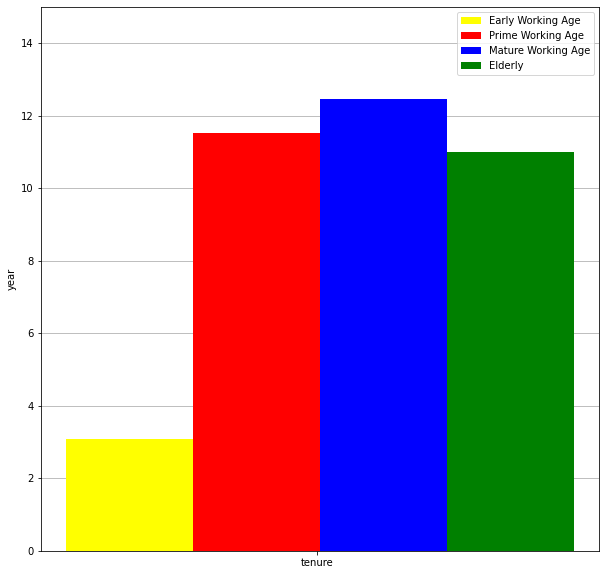

In [ ]:
subject = ['tenure']
data1 = df.groupby('age_range')[subject].mean()
index = np.arange(len(subject))
#score = np.arange(0,100,10)
early_working = list(data1.T['18-24'])
prime_working = list(data1.T['25-54'])
mature_working = list(data1.T['55-64'])
elderly = list(data1.T['65+']) 
#data1 = data1.reset_index(drop = True)
#fig,ax = plt.subplots()
bar_width = 0.1
plt.figure(figsize=[10,10])
plt.bar(index,early_working, width = bar_width, color = 'yellow', label = 'Early Working Age', zorder = 2)
plt.bar(index + bar_width , prime_working, width=bar_width, color = 'red', label = 'Prime Working Age',zorder = 2)
plt.bar(index + bar_width*2, mature_working,width = bar_width, color = 'blue', label = 'Mature Working Age',zorder = 2)
plt.bar(index + bar_width*3,elderly, width = bar_width, color = 'green',label = 'Elderly',zorder = 2)

plt.xticks(index + bar_width*1.48,subject)
plt.ylabel('year')
plt.legend()
plt.grid(axis='y')
plt.ylim(0,15)
plt.show()

--> Population Distribution in each states based on wealth segment

In [ ]:
state_nsw = df.copy(deep= True)
state_nsw['Valid'] = state_nsw['state'].astype(str).str.match(r'NSW')
state_nsw = state_nsw[state_nsw['Valid'] == True]
state_nsw = state_nsw['wealth_segment'].value_counts().rename_axis('unique_values').reset_index(name='counts')
state_nsw = state_nsw.T
col_nsw = state_nsw.iloc[0]
state_nsw.columns = col_nsw
state_nsw = state_nsw.drop('unique_values').rename(index = {'counts':'NSW'})
state_nsw.columns.name = None

state_qld = df.copy(deep= True)
state_qld['Valid'] = state_qld['state'].astype(str).str.match(r'QLD')
state_qld = state_qld[state_qld['Valid'] == True]
state_qld = state_qld['wealth_segment'].value_counts().rename_axis('unique_values').reset_index(name='counts')
state_qld = state_qld.T
col_qld = state_qld.iloc[0]
state_qld.columns = col_qld
state_qld = state_qld.drop('unique_values').rename(index = {'counts':'QLD'})
state_qld.columns.name = None

state_vic = df.copy(deep= True)
state_vic['Valid'] = state_vic['state'].astype(str).str.match(r'VIC')
state_vic = state_vic[state_vic['Valid'] == True]
state_vic = state_vic['wealth_segment'].value_counts().rename_axis('unique_values').reset_index(name='counts')
state_vic = state_vic.T
col_vic = state_vic.iloc[0]
state_vic.columns = col_vic
state_vic = state_vic.drop('unique_values').rename(index = {'counts':'VIC'})
state_vic.columns.name = None

In [ ]:
print(state_nsw)
print(state_qld)
print(state_vic)

    Mass Customer High Net Worth Affluent Customer
NSW          1039            535               515
    Mass Customer Affluent Customer High Net Worth
QLD           407               209            205
    Mass Customer High Net Worth Affluent Customer
VIC           505            255               238


In [ ]:
df_state = pd.concat([state_nsw,state_qld,state_vic])
df_state

,Mass Customer,High Net Worth,Affluent Customer
NSW,1039,535,515
QLD,407,205,209
VIC,505,255,238


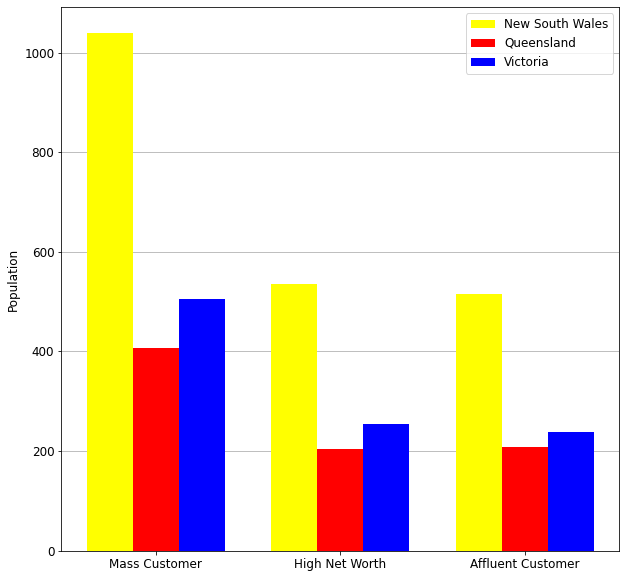

In [ ]:
wealth_segment = ['Mass Customer','High Net Worth','Affluent Customer']
index = np.arange(len(wealth_segment))
NSW = list(df_state.T['NSW'])
QLD = list(df_state.T['QLD'])
VIC = list(df_state.T['VIC'])
#data1 = data1.reset_index(drop = True)
#fig,ax = plt.subplots()
bar_width = 0.25
plt.figure(figsize=[10,10])
plt.bar(index,NSW, width = bar_width, color = 'yellow', label = 'New South Wales', zorder = 2)
plt.bar(index + bar_width , QLD, width=bar_width, color = 'red', label = 'Queensland',zorder = 2)
plt.bar(index + bar_width*2, VIC,width = bar_width, color = 'blue', label = 'Victoria',zorder = 2)

plt.xticks(index + bar_width*1,wealth_segment,fontsize='large')
plt.yticks(fontsize = 'large')
plt.ylabel('Population', fontsize='large')
plt.legend(fontsize='large')
plt.grid(axis='y')
plt.show()

--> Age Vs bike related purchase

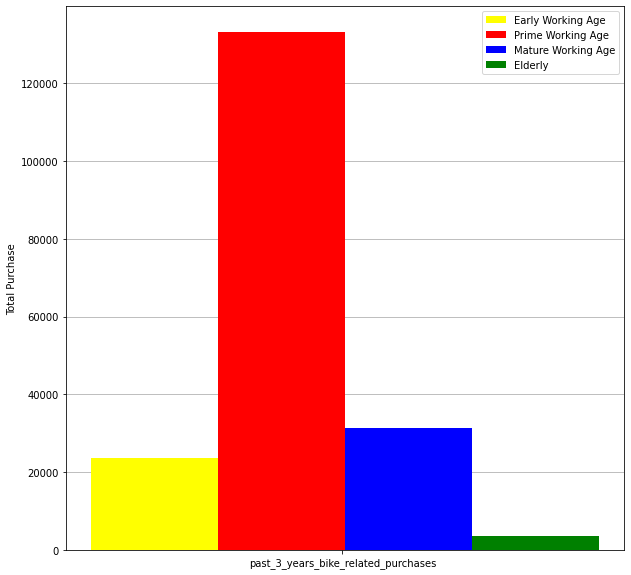

In [ ]:
subject_bike_purchase = ['past_3_years_bike_related_purchases']
data_bike_purchase_vs_age = df.groupby('age_range')[subject_bike_purchase].sum()
index = np.arange(len([subject_bike_purchase]))
#score = np.arange(0,100,10)
early_working = list(data_bike_purchase_vs_age.T['18-24'])
prime_working = list(data_bike_purchase_vs_age.T['25-54'])
mature_working = list(data_bike_purchase_vs_age.T['55-64'])
elderly = list(data_bike_purchase_vs_age.T['65+']) 
#data1 = data1.reset_index(drop = True)
#fig,ax = plt.subplots()
bar_width = 0.1
plt.figure(figsize=[10,10])
plt.bar(index,early_working, width = bar_width, color = 'yellow', label = 'Early Working Age', zorder = 2)
plt.bar(index + bar_width , prime_working, width=bar_width, color = 'red', label = 'Prime Working Age',zorder = 2)
plt.bar(index + bar_width*2, mature_working,width = bar_width, color = 'blue', label = 'Mature Working Age',zorder = 2)
plt.bar(index + bar_width*3,elderly, width = bar_width, color = 'green',label = 'Elderly',zorder = 2)

plt.xticks(index + bar_width*1.48,subject_bike_purchase)
plt.ylabel('Total Purchase')
plt.legend()
plt.grid(axis='y')
#plt.ylim(0,60)
plt.show()


In [ ]:
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
